In [1]:
# Name: Sarat
# Roll No: S20200010107
# Section: 1
# Assignment: 7

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [32]:
a = np.array([1,2,3])
b = np.array([[4],[5],[6]])
a.dot(b)

array([32])

In [4]:
df = pd.read_csv('House Price.csv')

df.head()

,Crime Rate,Residential Zone Area,Industrial Zone Area,River Side,Nitric Oxide Emmisions,Avg. Rooms/Dwelling,AGE,Distance to Employement Centers,accessibility to highways,Tax rate/10000 RS,Student Teacher RATIO in schools,Median Value of Houses in Lakhs
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,36.2


In [5]:
len(df)

506

In [6]:
# df = df.sample(frac=1)

In [7]:
# df.head(15)

In [8]:
train = df[0:int(len(df)*0.7)]
test = df[int(len(df)*0.7):]

In [9]:
len(train)

354

In [10]:
def grad_des(x, y, alpha, epochs):
    
    m = np.shape(x)[0] # samples
    n = np.shape(x)[1] # features
    
    x = np.concatenate((np.ones((m,1)),x), axis=1)
#     w = np.random.randn(n+1,)
    w = 2*np.random.rand(n+1,)-1
    sst = 0
    loss_history = []
    
    for current_iteration in range(epochs):
        y_estimated = w.dot(x.T)
        error = y_estimated - y
        cost = np.sum(error ** 2)
        gradient = (1 / m) * x.T.dot(error)
        w = w - alpha * gradient
        sst = np.sum((y_estimated - y.mean())**2)
        loss_history.append(cost)
#     print(sst, cost)
    return loss_history, w, sst

[-0.2229441   0.65714461 -0.56487969  0.10006411 -0.28505247  0.34588764
 -0.08579907  0.86960226 -0.71331691 -0.78814162 -0.05652422  0.1780907 ]


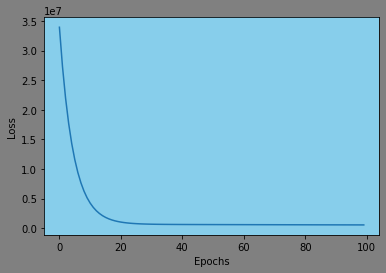

In [25]:
train = np.array(train)
test = np.array(test)
loss_history, w, sst = grad_des(train[:,:-1], train[:,-1], 0.000001, 100)
print(w)
    


plt.figure(facecolor='grey')
ax = plt.axes()
ax.set_facecolor("skyblue")
plt.plot(np.arange(len(loss_history)), loss_history)
plt.xlabel('Epochs') # X-Label
plt.ylabel('Loss') # Y-Label
# show() is used for displaying the plot
plt.show()

In [12]:
sse = loss_history[-1]
# print(sst, sse)
mse = loss_history[-1]/len(train)
r2 = (sse - sst)/sse

In [13]:
print(f"SSE for the training set is: {sse}")
print(f"MSE for the training set is: {mse}")
print(f"R square value for training set is: {r2}")

SSE for the training set is: 133901.03735534567
MSE for the training set is: 378.25151795295386
R square value for training set is: 0.3329812169750057


In [26]:
def predict(x,w):
    
    m = np.shape(x)[0]
    
    x = np.concatenate((np.ones((m,1)),x), axis=1)
    
    return w.dot(x.T)

In [27]:
y_predict = predict(test[:,:-1],w)

y = test[:,-1]

In [28]:
sst = np.sum((y_predict - y.mean())**2)
sse = np.sum((y_predict - y)**2)
mse = sse/len(test)
r2 = (sse - sst)/sse

In [29]:
print(f"SSE for the test set is: {sse}")
print(f"MSE for the test set is: {mse}")
print(f"R square value for test set is: {r2}")

SSE for the test set is: 116724.68777159462
MSE for the test set is: 767.9255774447014
R square value for test set is: 0.19178476035129888


In [30]:
train[:,:-1].shape

(354, 11)